## **Цель: изучить применение дерева решений в рамках задачи регрессии** 

 В качестве датасета взяты данные о недвижимости Калифорнии из библиотеки sklearn.datasets. 
 Целевая переменная – MedHouseVal.  На полученных данных построить модель регрессии и дерево решений.

In [1]:
import numpy as np
import pandas as pd 
import scipy.stats 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor


In [2]:
import sklearn.datasets

In [3]:
df = sklearn.datasets.fetch_california_housing()

In [4]:
for key in df.keys():
    print( key )

data
target
frame
target_names
feature_names
DESCR


In [5]:
# признаки дата фрейма
df.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [6]:
# наименование целевой переменной
df.target_names

['MedHouseVal']

In [7]:
# описание полей
print(sklearn.datasets.fetch_california_housing().DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [8]:
# признаки для обучения модели
X = pd.DataFrame(df.data, columns=df.feature_names)
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [9]:
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [10]:
# целевая переменная
y=pd.DataFrame(df.target, columns=df.target_names)
y.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f15a2532a00>]],
      dtype=object)

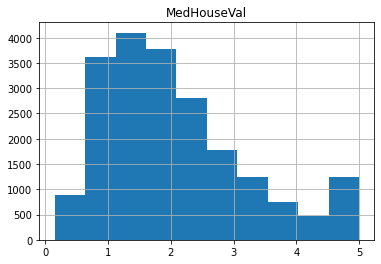

In [11]:
y.hist()

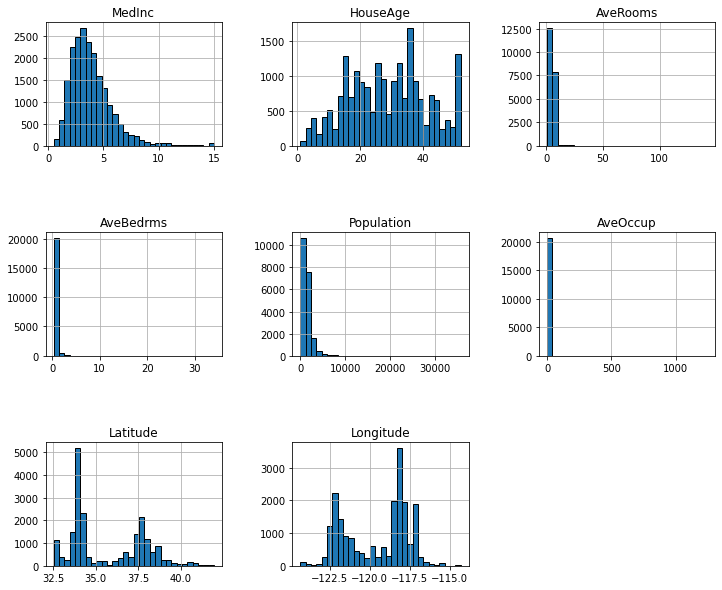

In [12]:
X.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

In [13]:
# пропусков в данных нет
X.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [15]:
# разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

## Модель регрессии

In [16]:
# обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
# предсказание целевой переменной для каждой выборки
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [18]:
# точность модели на тренировочной выборке
model.score(  X_train , y_train )

0.6125511913966952

In [19]:
# точность модели на тестовой выборке
model.score(  X_test , y_test )

0.575787706032451

## Дерево решений

In [20]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [21]:
# обучаем модель
clf = DecisionTreeRegressor()
clf.fit(X_train, y_train)

DecisionTreeRegressor()

In [22]:
clf.predict(X_test)

array([0.425  , 1.203  , 5.00001, ..., 5.00001, 0.66   , 2.172  ])

In [23]:
clf.score(  X_train , y_train )

1.0

In [24]:
# в модели не была задана глубина дерева, в связи с чем видим переобучение модели (сильная разница в score между обучающей и тестовой выборкой)
clf.score(  X_test , y_test )

0.6170412844248749

## Дерево решений с заданной глубиной

In [25]:
# зададим глубину дерева равную 9
clf = DecisionTreeRegressor(max_depth=9)
clf.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=9)

In [26]:
clf.predict(X_test)

array([0.55839351, 0.77448744, 4.87159529, ..., 4.9654272 , 0.77448744,
       1.67481557])

In [27]:
clf.score(  X_train , y_train )

0.7999255297501255

In [28]:
# Получаем более оптимальные значения score при заданной глубине дерева
clf.score(  X_test , y_test )

0.6872565953691838

# Визуализируем часть дерева решений (с глубиной 3)

In [29]:

clf = DecisionTreeRegressor(max_depth=3)
clf.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [30]:
clf.predict(X_test)

array([1.62582288, 1.16511993, 2.73565309, ..., 4.57673829, 1.16511993,
       1.86688424])

In [31]:
clf.score(  X_train , y_train )

0.5378979887726012

In [32]:
clf.score(  X_test , y_test )

0.5097629887358219

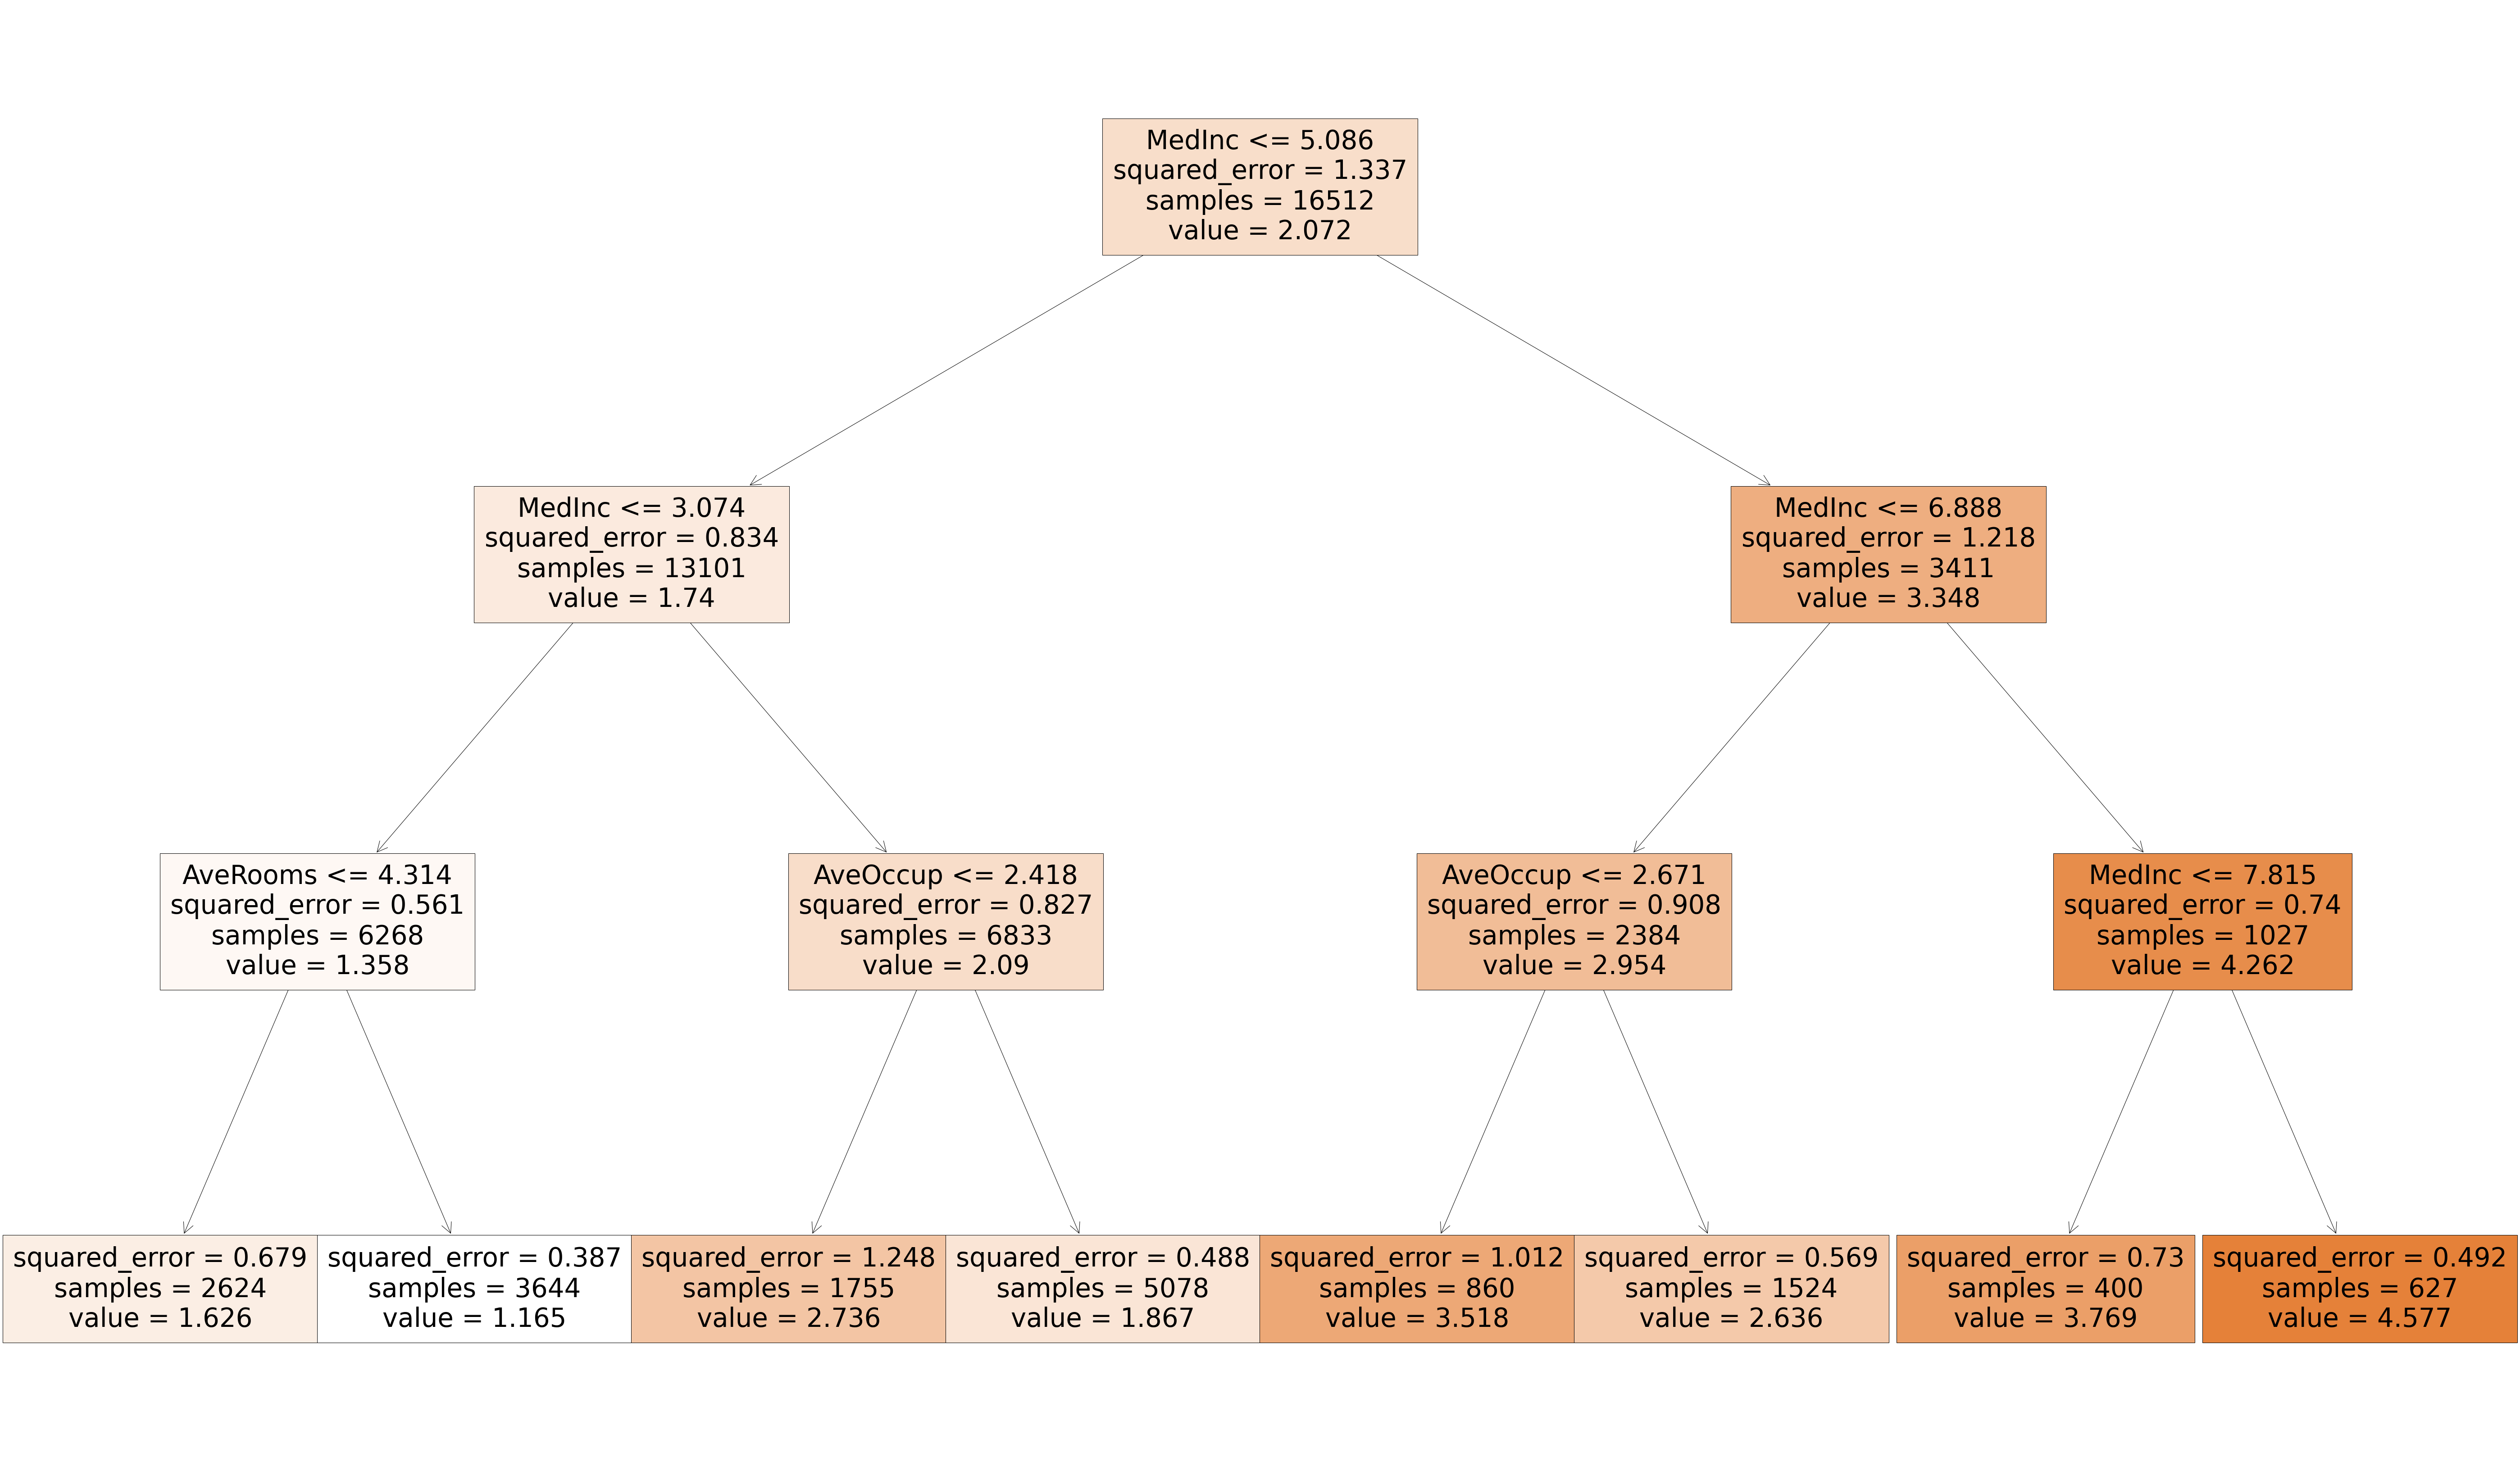

In [33]:
from sklearn.tree import plot_tree

plt.figure(figsize=(100, 60))
plot_tree(clf, feature_names=X_test.columns, filled=True);

In [33]:
## Видим, что оптимально подобранные параметры дерева решений, позволили получить более качественную модель, чем модель регрессии